In [12]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql import SparkSession 
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
import matplotlib.pyplot as plt
conf = SparkConf().setAppName("DataVisualization").setMaster("local")
sc = SparkSession.builder.config("spark.driver.host", "localhost").getOrCreate()
#.config ("spark.sql.execution.arrow.enabled", "true").getOrCreate()
#.config ("spark.sql.shuffle.partitions", "50") \
#.config("spark.driver.maxResultSize","5g") \


# Read Credit Card Info from DB to a Data Frame
df_credit=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_CREDIT_CARD").load()

# Read Branch Info from DB to a Data Frame
df_branch=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_BRANCH").load()

# Read Customer Info from DB to a Data Frame
df_cust=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_CUSTOMER").load()


Find and plot transactions, showing which transaction type occurs most often.

<AxesSubplot:xlabel='TRANSACTION_TYPE'>

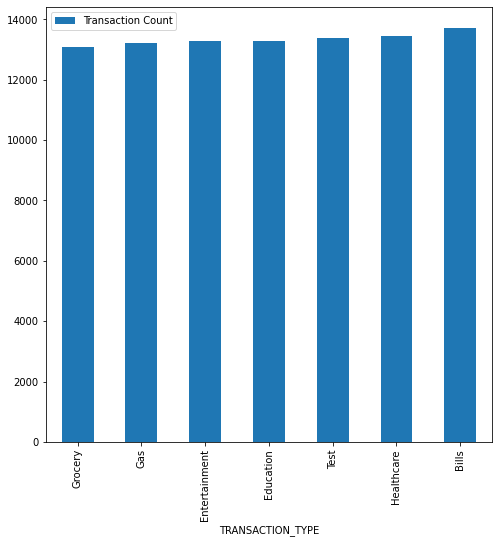

In [3]:

df_credit_pd = df_credit.groupBy('TRANSACTION_TYPE') \
        .agg(count('TRANSACTION_ID').alias('Transaction Count'), \
            (sum('TRANSACTION_VALUE')).alias('Total Transaction Value') ) \
        .sort('Transaction Count') \
        .toPandas()

df_credit_pd.plot.bar(x='TRANSACTION_TYPE', y='Transaction Count', figsize=(8, 8))


Find and plot states, showing which state has the highest number of customers.

+----------+-------------+
|CUST_STATE|CustomerCount|
+----------+-------------+
|        NY|          192|
|        GA|          146|
|        PA|          144|
|        FL|          128|
|        IL|          116|
|        NJ|          106|
|        MD|          100|
|        CA|           90|
|        MI|           88|
|        OH|           88|
|        VA|           78|
|        NC|           74|
|        TX|           66|
|        MA|           66|
|        SC|           60|
|        WI|           58|
|        MN|           56|
|        MS|           48|
|        IA|           42|
|        KY|           34|
+----------+-------------+
only showing top 20 rows



<AxesSubplot:xlabel='CUST_STATE', ylabel='Customer Count'>

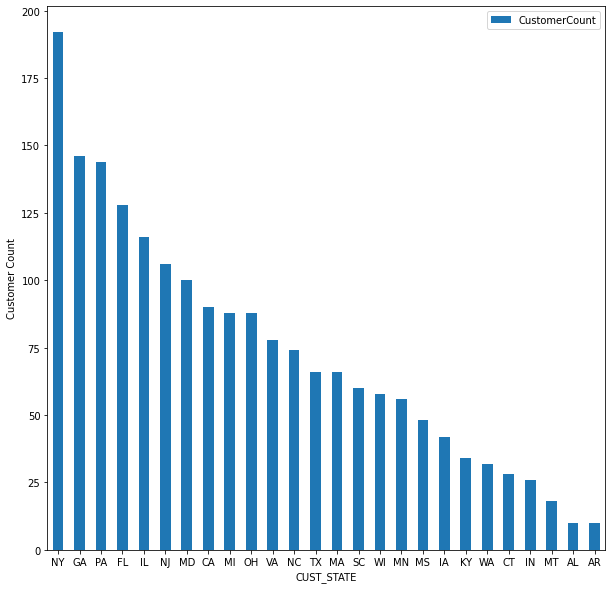

In [4]:
df_cust.groupBy('CUST_STATE') \
        .agg(count('SSN').alias('CustomerCount')) \
        .orderBy('CustomerCount', ascending=False).show()

df_cust_pd = df_cust.groupBy('CUST_STATE') \
        .agg(count('SSN').alias('CustomerCount')) \
        .orderBy('CustomerCount', ascending=False).toPandas()

df_cust_pd.plot.bar(x='CUST_STATE', y='CustomerCount' , ylabel = 'Customer Count',rot=0, figsize=(10, 10) )


Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount. (First 20)
hint(use CUST_SSN).

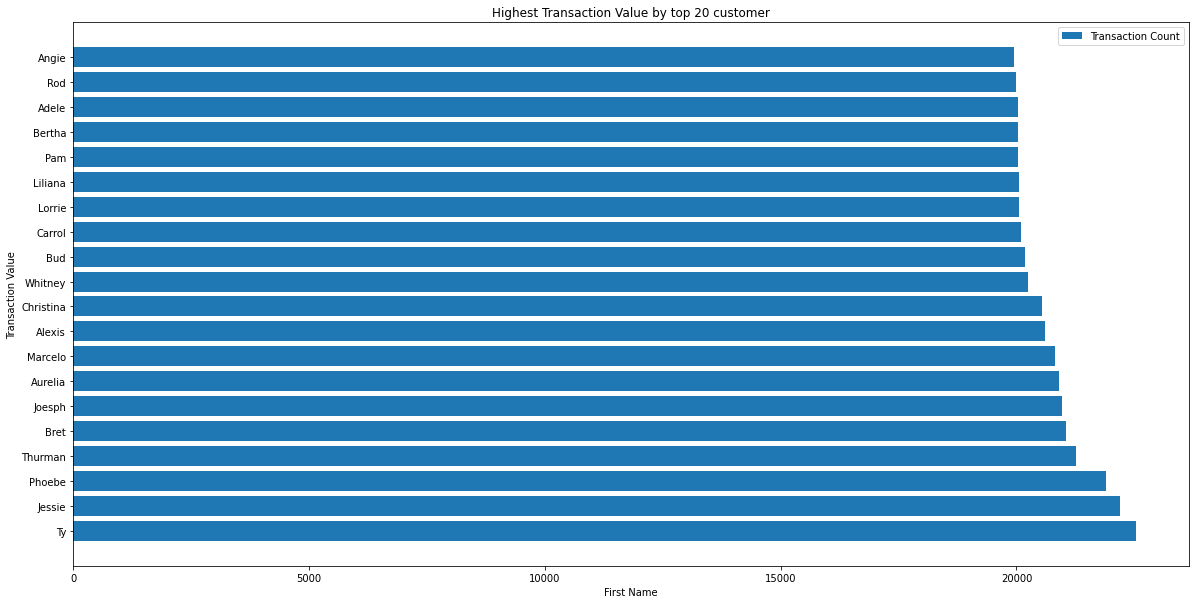

In [42]:
from matplotlib.pyplot import figure
df_cust_credit_pd = df_credit.join(df_cust, df_credit.CUST_SSN == df_cust.SSN, 'inner'). \
    groupBy('CUST_SSN', 'FIRST_NAME') \
        .agg(sum('TRANSACTION_VALUE').alias('Total Transaction Value'))  \
        .orderBy('Total Transaction Value', ascending=False).limit(20).toPandas()
plt.figure(figsize=(20, 10))

plt.barh(df_cust_credit_pd['FIRST_NAME'], df_cust_credit_pd['Total Transaction Value'])
plt.ylabel("Transaction Value")
plt.xlabel("First Name")
plt.legend(['Transaction Count'])
plt.title("Highest Transaction Value by top 20 customer")

plt.show()


#ax_bar = df_cust_credit_pd.plot.bar(x='FIRST_NAME', y='Total Transaction Value', ylabel = 'TRANSACTION_VALUE', figsize=(20, 10) )    


Find and plot the top three months with the largest transaction data

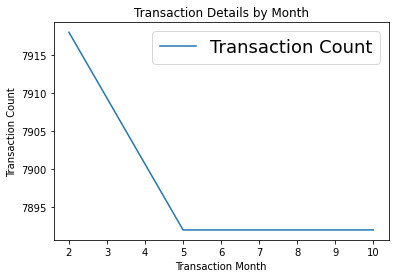

In [24]:
import pyspark.sql.functions as f
df_credit_pd_2 = df_credit.groupBy(f.month('TIMEID').alias('TransactionMonth')) \
        .agg(count('TRANSACTION_ID').alias('Transaction Count'), \
            (sum('TRANSACTION_VALUE')).alias('Total Transaction Value') ) \
        .orderBy('Transaction Count', ascending=False) \
        .limit(3).toPandas()
plt.plot(df_credit_pd_2['TransactionMonth'], df_credit_pd_2['Transaction Count'])
plt.ylabel("Transaction Count")
plt.xlabel("Transaction Month")
plt.legend(['Transaction Count'], fontsize=18)
plt.title("Transaction Details by Month")
plt.show()
#plt.plot(df_credit_pd_2['TransactionMonth'], df_credit_pd_2['Transaction Count'], ylabel = 'Transaction Count', rot=0, figsize=(10, 10) )    

<AxesSubplot:ylabel='BRANCH_CITY'>

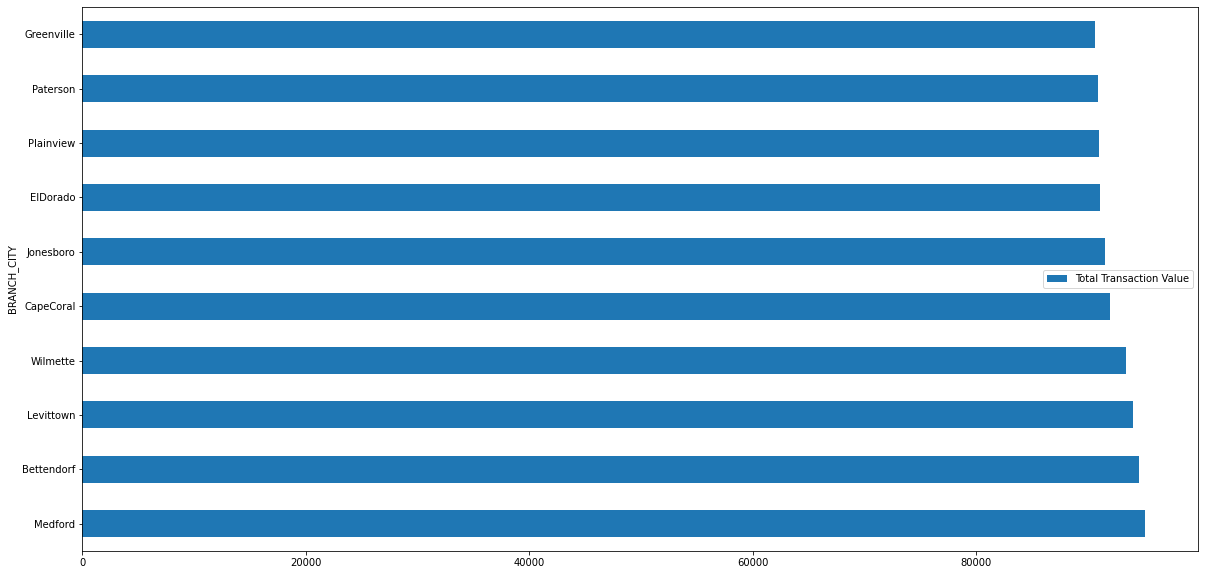

In [7]:
df_branch_credit_pd = df_credit.join(df_branch, df_credit.BRANCH_CODE == df_branch.BRANCH_CODE, 'inner') \
        .groupBy('BRANCH_CITY') \
        .agg(sum('TRANSACTION_VALUE').alias('Total Transaction Value')) \
        .orderBy('Total Transaction Value', ascending=False).limit(10) \
        .toPandas()

df_branch_credit_pd.plot.barh(x='BRANCH_CITY', y='Total Transaction Value' , rot=0, figsize=(20, 10) )    
